In [1]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.2/233.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

In [3]:
!pip install -U ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=20eb501268801ae816a4c46b042e5d0eb8d2dcc9f3cfe70f9b44b9f9b4801300
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [4]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.7 MB/s eta 0:00:00


In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.1 MB/s eta 0:00:00


In [6]:
!pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 19.6 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [7]:
!pip install permetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 kB 899.2 kB/s eta 0:00:00


In [8]:
import pandas as pd
import requests
from tqdm import tqdm
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SequentialFeatureSelector

**Загрузка данных и очистка**

Произведен парсинг данных с помощью API HH.ru

In [ ]:
uni_data = pd.read_csv('uni_data.csv')

In [ ]:
uni_data = uni_data.drop('Unnamed: 0', axis=1)

In [ ]:
uni_data.head()

,key_skills,area,schedule,experience,salary_from,salary_to,currency,created_at,employment,languages,professional_roles
0,"Linux, SQL, Unix",Тверь,Сменный график,От 1 года до 3 лет,NaN,200000.0,RUR,2024-08-22T13:08:27+0300,Полная занятость,NaN,Системный инженер
1,"BPMN, EPC, UML, MS Dynamics CRM, Power BI, SQL...",Москва,Удаленная работа,От 1 года до 3 лет,NaN,150000.0,RUR,2024-08-22T13:08:27+0300,Полная занятость,Английский,Бизнес-аналитик
2,NaN,Москва,Полный день,От 3 до 6 лет,NaN,370000.0,RUR,2024-08-22T13:08:27+0300,Полная занятость,NaN,Аналитик
3,"Работа в команде, Работа с базами данных, Базы...",Симферополь,Полный день,От 3 до 6 лет,35000.0,NaN,RUR,2024-08-22T13:08:27+0300,Полная занятость,NaN,Системный администратор
4,"PostgreSQL, Clickhouse, Numpy, pandas, Kuberne...",Москва,Полный день,От 3 до 6 лет,NaN,350000.0,RUR,2024-08-22T13:08:27+0300,Полная занятость,NaN,Дата-сайентист


Определить тип данных в каждом столбце

In [ ]:
uni_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469 entries, 0 to 7468
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   key_skills          5280 non-null   object 
 1   area                7469 non-null   object 
 2   schedule            7314 non-null   object 
 3   experience          7469 non-null   object 
 4   salary_from         5169 non-null   float64
 5   salary_to           3586 non-null   float64
 6   currency            6195 non-null   object 
 7   created_at          7469 non-null   object 
 8   employment          7314 non-null   object 
 9   languages           622 non-null    object 
 10  professional_roles  7314 non-null   object 
dtypes: float64(2), object(9)
memory usage: 642.0+ KB


Определить количество отсутствующих значений

In [ ]:
uni_data.isna().sum()

,0
key_skills,2189
area,0
schedule,155
experience,0
salary_from,2300
salary_to,3883
currency,1274
created_at,0
employment,155
languages,6847


Привести данные к необходимым типам

In [ ]:
uni_data['salary_from'] = pd.to_numeric(uni_data['salary_from'], errors='coerce')
uni_data['salary_to'] = pd.to_numeric(uni_data['salary_to'], errors='coerce')

In [ ]:
df_copy = uni_data.copy()

Берем среднее арифметическое от опыта и диапазона зарплат

In [ ]:
def clean_exp(exp):
    try:
        if pd.isna(exp):
            return None

        years = re.findall(r'\d+', exp)
        exp_cleaned = None

        if len(years) == 1:
            exp_cleaned = int(years[0])
        elif len(years) == 2:
            exp_cleaned = (int(years[0]) + int(years[1])) / 2
        elif len(years) == 0:
            exp_cleaned = 0

    except Exception as e:
        print(f"An error occurred: {e}")
        return None

    return exp_cleaned

In [ ]:
def clean_salary(df):
    df.loc[(~df['salary_from'].isna()) & (~df['salary_to'].isna()), 'salary'] = (df['salary_from'] + df['salary_to']) / 2

    df.loc[(~df['salary_from'].isna()) & (df['salary_to'].isna()), 'salary'] = df['salary_from']
    df.loc[(df['salary_from'].isna()) & (~df['salary_to'].isna()), 'salary'] = df['salary_to']
    df = df.drop(['salary_to', 'salary_from'], axis=1)
    return df

In [ ]:
df_copy['salary'] = ''

In [ ]:
df_copy['key_skills'] = df_copy['key_skills'].str.lower()
df_copy['experience'] = df_copy['experience'].apply(clean_exp)
df_copy = clean_salary(df_copy)

In [ ]:
df_copy['salary'] = pd.to_numeric(df_copy['salary'], errors='coerce')

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469 entries, 0 to 7468
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   key_skills          5280 non-null   object 
 1   area                7469 non-null   object 
 2   schedule            7314 non-null   object 
 3   experience          7469 non-null   float64
 4   currency            6195 non-null   object 
 5   created_at          7469 non-null   object 
 6   employment          7314 non-null   object 
 7   languages           622 non-null    object 
 8   professional_roles  7314 non-null   object 
 9   salary              6195 non-null   float64
dtypes: float64(2), object(8)
memory usage: 583.6+ KB


Признак - названия профессий будут важны для группировки навыков по процессиям. Зарплата будет таргетом.  Необходимо почистить отсутствующие значения в этих столбцах.

In [ ]:
df_copy = df_copy.dropna(subset='salary')
df_copy = df_copy.dropna(subset='professional_roles')

In [ ]:
df_copy.isna().sum()

,0
key_skills,1876
area,0
schedule,0
experience,0
currency,0
created_at,0
employment,0
languages,5696
professional_roles,0
salary,0


Таргетная переменная - зарплата представлена в разных валютах. Это создает необъективную оценку и выбросы.  Переводим в русские рубли,  учитываем курс валют на дату создания вакансии.  Используем API Центрального Банка.

In [ ]:
df_copy['created_at'] = [date[:10] for date in df_copy['created_at']]

In [ ]:
def to_rur(row):
    if row['currency'] != 'RUR':
        date = row['created_at']
        year = date[:4]
        month = date[5:7]
        day = date[8:10]

        url = f'http://www.cbr.ru/scripts/XML_daily.asp?date_req={day}/{month}/{year}'
        df = pd.read_xml(url, encoding='cp1251')
        if row['currency'] == 'BYR':
            row['currency'] = 'BYN'
        value = df[df['CharCode'] == row['currency']]['Value']
        if not value.empty:
            value = value.item().replace(',', '.')
            row['salary'] *= float(value)
            row['currency'] = 'RUR'
    return row

In [ ]:
df_copy = df_copy.apply(to_rur, axis=1)

Валюта и дата создания вакансии больше не нужны для дальнейшего анализа.

In [ ]:
df_copy = df_copy.drop(['currency', 'created_at'], axis=1)

Пропуски в столбце с языками составляют более 15%.

In [ ]:
df_copy = df_copy.drop('languages', axis=1)

Удаляем дубликаты при их наличии

In [ ]:
df_copy = df_copy.drop_duplicates()

In [ ]:
df_copy.head()

,key_skills,area,schedule,experience,employment,professional_roles,salary
0,"linux, sql, unix",Тверь,Сменный график,2.0,Полная занятость,Системный инженер,200000.0
1,"bpmn, epc, uml, ms dynamics crm, power bi, sql...",Москва,Удаленная работа,2.0,Полная занятость,Бизнес-аналитик,150000.0
2,NaN,Москва,Полный день,4.5,Полная занятость,Аналитик,370000.0
3,"работа в команде, работа с базами данных, базы...",Симферополь,Полный день,4.5,Полная занятость,Системный администратор,35000.0
4,"postgresql, clickhouse, numpy, pandas, kuberne...",Москва,Полный день,4.5,Полная занятость,Дата-сайентист,350000.0


Во время парсинга были отобраны вакансии, не связанные с DS. Также столбец professional roles позоляет удобно сгруппировать профессии для дальнейшей обработки навыков.

In [ ]:
roles_to_filter = [
    'Дата-сайентист',
    'Бизнес-аналитик',
    'Аналитик',
    'BI-аналитик, аналитик данных',
    'Системный аналитик',
    'Продуктовый аналитик',
    'Маркетолог-аналитик'
]

filtered_df = df_copy[df_copy['professional_roles'].isin(roles_to_filter)]

По результатам предварительного анализа необходима визуализация

In [ ]:
from ydata_profiling import ProfileReport

ProfileReport(filtered_df, title='My Report')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Признак key_skills будет обрабатан далее. Будет собран словарь синонимов навыков и отобраны уникальные навыки. Признаки будут закодированы. Очистим от отсутствующих значений



In [ ]:
filtered_df = filtered_df.dropna(subset='key_skills')

Рассчет ключевых статистик для каждого типа данных

In [ ]:
filtered_df.describe(include='all')

,key_skills,area,schedule,experience,employment,professional_roles,salary
count,3539,3539,3539,3539.000000,3539,3539,3.539000e+03
unique,2953,182,5,NaN,4,7,NaN
top,"анализ данных, sql, аналитическое мышление, ра...",Москва,Полный день,NaN,Полная занятость,Аналитик,NaN
freq,38,1385,2373,NaN,3250,1854,NaN
mean,NaN,NaN,NaN,2.340492,NaN,NaN,4.207946e+06
std,NaN,NaN,NaN,1.551382,NaN,NaN,5.590248e+07
min,NaN,NaN,NaN,0.000000,NaN,NaN,6.000000e+01
25%,NaN,NaN,NaN,2.000000,NaN,NaN,7.500000e+04
50%,NaN,NaN,NaN,2.000000,NaN,NaN,1.140000e+05
75%,NaN,NaN,NaN,4.500000,NaN,NaN,2.000000e+05


Рассмотрим распределения признаков и удалим выбросы

К выбросам чувствительны коэффициенты корреляции

{'whiskers': [<matplotlib.lines.Line2D at 0x7e55d162e7d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e55d162c490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e55d162e530>],
 'medians': [<matplotlib.lines.Line2D at 0x7e55d162f5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e55d162df60>],
 'means': []}

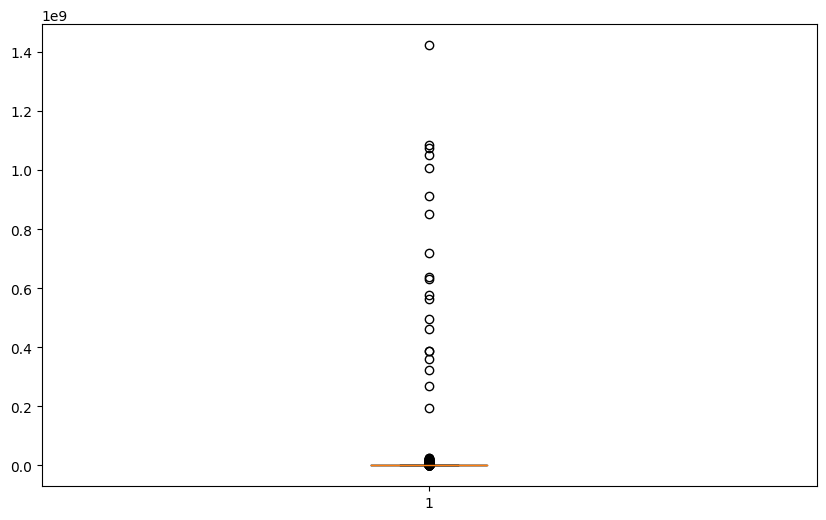

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(10,6))
plt.boxplot(filtered_df['salary'])

In [ ]:
q_high = filtered_df.salary.quantile(0.915)
q_low = filtered_df.salary.quantile(0.085)
clear_data = filtered_df[(filtered_df.salary < q_high) & (filtered_df.salary > q_low)]
print(f"До удаления выбросов {filtered_df.shape[0]}")
print(f"После удаления выбросов {clear_data.shape[0]}")
print(f"Удалились данные {filtered_df.shape[0] - clear_data.shape[0]}")

До удаления выбросов 3539
После удаления выбросов 2903
Удалились данные 636


{'whiskers': [<matplotlib.lines.Line2D at 0x7e55c2b7a380>,
 'caps': [<matplotlib.lines.Line2D at 0x7e55c2b7ad40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e55c2b7b970>],
 'medians': [<matplotlib.lines.Line2D at 0x7e55c2b7b340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e55c2b79b10>],
 'means': []}

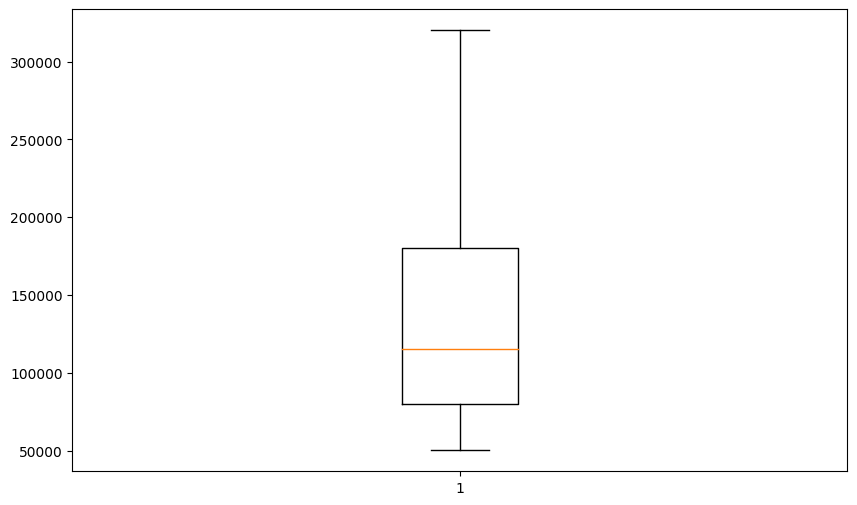

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(10,6))
plt.boxplot(clear_data['salary'])

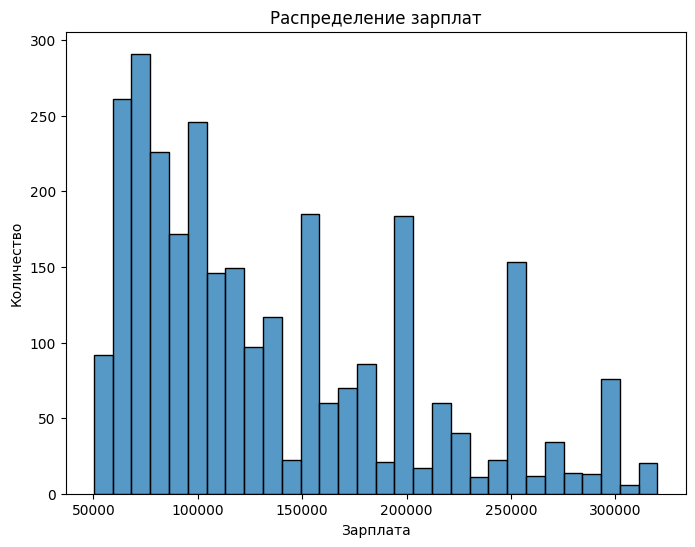

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(clear_data['salary'], bins=30, kde=False)
plt.title('Распределение зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.show()

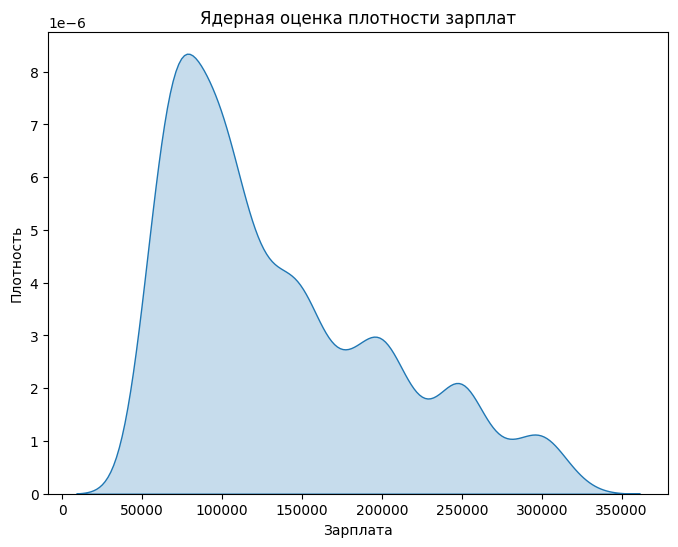

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(clear_data['salary'], shade=True)
plt.title('Ядерная оценка плотности зарплат')
plt.xlabel('Зарплата')
plt.ylabel('Плотность')
plt.show()

In [ ]:
profs = []
for prof in clear_data['professional_roles']:
    if isinstance(prof, str):
        profs.append(prof)

prof_counts = Counter(profs)

df_profs_counts = pd.DataFrame(prof_counts.items(), columns=['Job', 'Frequency']).sort_values(by='Frequency', ascending=False)
df_profs_counts

,Job,Frequency
1,Аналитик,1487
0,Бизнес-аналитик,482
6,Системный аналитик,442
2,"BI-аналитик, аналитик данных",303
3,Дата-сайентист,104
4,Продуктовый аналитик,77
5,Маркетолог-аналитик,8


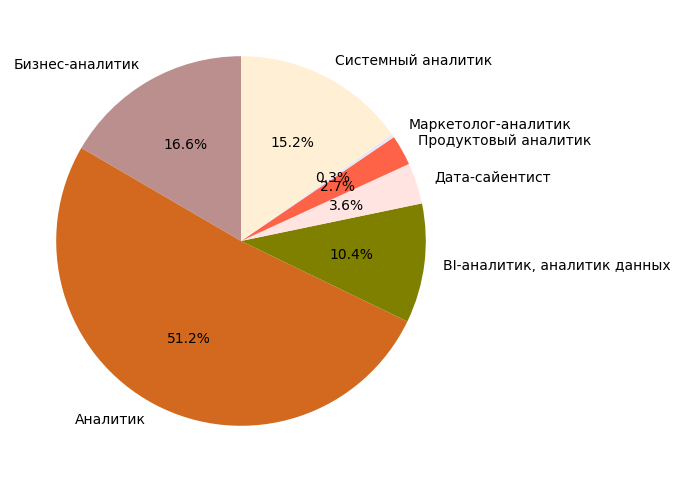

In [ ]:
fig = plt.figure(figsize=(10,6))
colors = ['rosybrown', 'chocolate', 'olive', 'mistyrose', 'tomato', 'lavender', 'papayawhip']
plt.pie(prof_counts.values(), colors=colors, labels=prof_counts.keys(), startangle=90, autopct='%.1f%%')
plt.show()

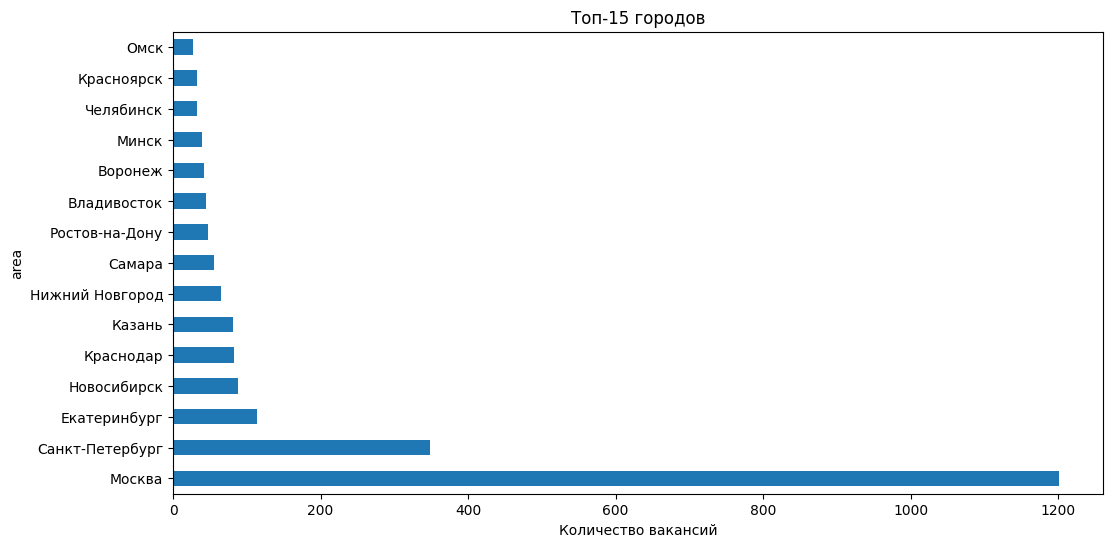

In [ ]:
plt.figure(figsize=(12,6))
clear_data["area"].value_counts().nlargest(15).plot(kind='barh')
plt.title('Топ-15 городов')
plt.xlabel('Количество вакансий')
plt.show()

Распределение графика работы, опыта работы, занятости

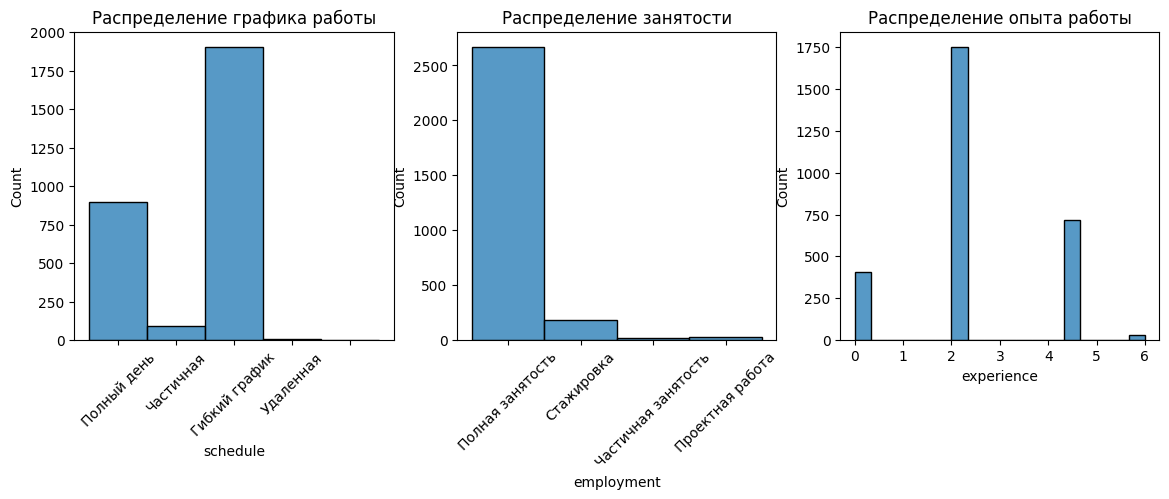

In [ ]:
fig = plt.figure()
fig.tight_layout()
fig.set_size_inches(14, 4)
ax_1 = fig.add_subplot(131)
sns.histplot(clear_data, x='schedule')
ax_1.set_xticklabels(['Полный день', 'Частичная', 'Гибкий график', 'Удаленная'], rotation=45)

ax_2 = fig.add_subplot(132)
ax_2 = sns.histplot(clear_data, x='employment')
ax_2.set_xticklabels(['Полная занятость', 'Стажировка', 'Частичная занятость', 'Проектная работа'], rotation=45)

ax_3 = fig.add_subplot(133)
ax_3 = sns.histplot(clear_data, x='experience')

ax_1.set(title = 'Распределение графика работы')
ax_2.set(title = 'Распределение занятости')
ax_3.set(title = 'Распределение опыта работы')

plt.show()

Распределение графика работы, названия работы, занятости от таргетной переменной

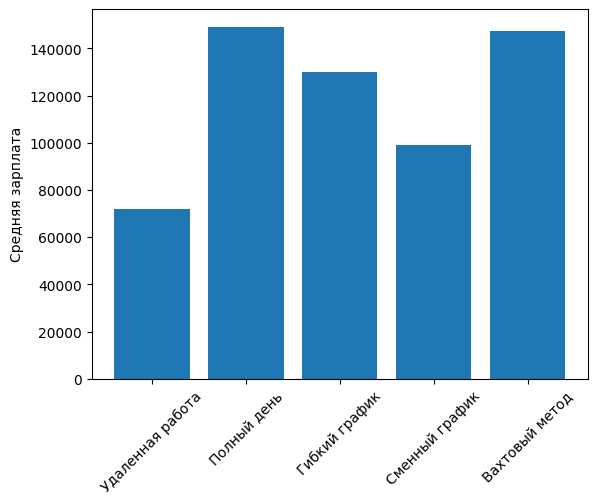

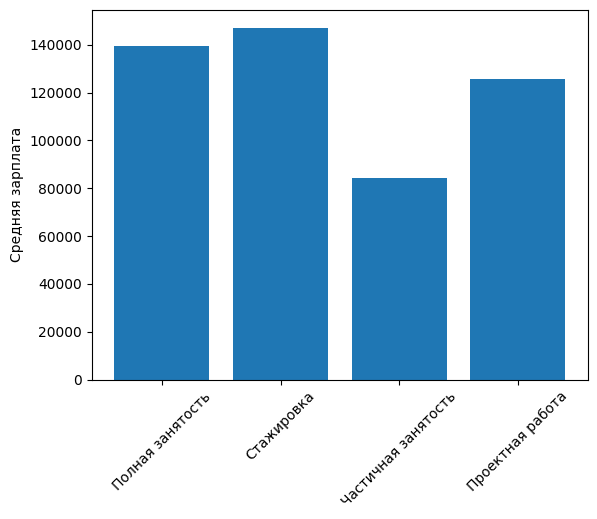

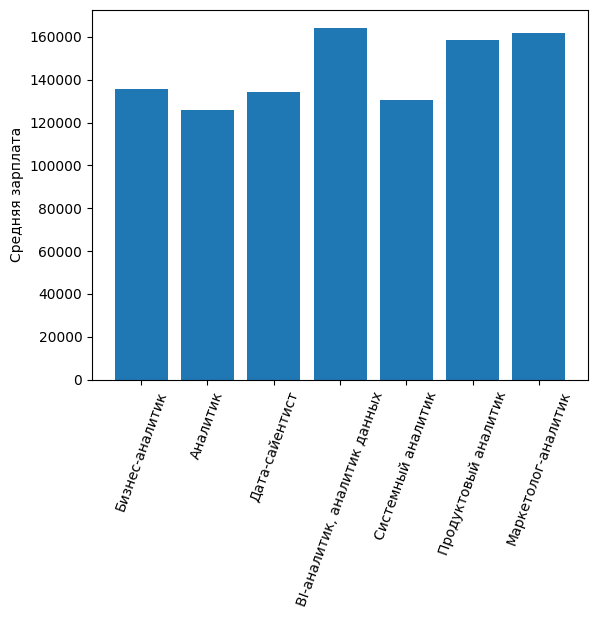

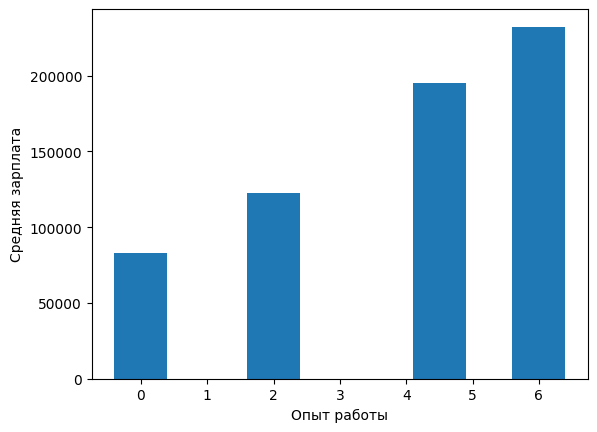

In [ ]:
main = clear_data.groupby('schedule')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main.index, main)

ax.set_xticks(range(len(main.index)))
ax.set_xticklabels(['Удаленная работа', 'Полный день', 'Гибкий график',
       'Сменный график', 'Вахтовый метод'], rotation=45)
ax.set_ylabel('Средняя зарплата')

main_2 = clear_data.groupby('employment')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main_2.index, main_2)

ax.set_xticks(range(len(main_2.index)))
ax.set_xticklabels(['Полная занятость', 'Стажировка', 'Частичная занятость',
       'Проектная работа'], rotation=45)
ax.set_ylabel('Средняя зарплата')

main_3 = clear_data.groupby('professional_roles')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main_3.index, main_3)

ax.set_xticks(range(len(main_3.index)))
ax.set_xticklabels(['Бизнес-аналитик', 'Аналитик', 'Дата-сайентист',
       'BI-аналитик, аналитик данных', 'Системный аналитик',
       'Продуктовый аналитик', 'Маркетолог-аналитик'], rotation=70, fontsize=10)
ax.set_ylabel('Средняя зарплата')

main_4 = clear_data.groupby('experience')['salary'].mean()

fig, ax = plt.subplots()
ax.bar(main_4.index, main_4)
ax.set_xlabel('Опыт работы')
ax.set_ylabel('Средняя зарплата')

plt.show()

Эмпирически установлено, что ошибка больше, когда CatBoost сам обрабатывает категориальные признаки. Качество было лучше при ручном енкодинге признаков

In [ ]:
col_clear_data = clear_data.copy() #создаем копию датафрейма для анализа линейности/нелинейности

In [ ]:
o = ['area', 'schedule', 'employment', 'professional_roles']
for col in o:
    if col_clear_data[col].nunique() < 5:
        one_hot = pd.get_dummies(col_clear_data[col], prefix=col, drop_first=True)
        col_clear_data = pd.concat([col_clear_data.drop(col, axis=1), one_hot], axis=1)
    else:
        mean_target = col_clear_data.groupby(col)['salary'].mean()
        col_clear_data[col] = col_clear_data[col].map(mean_target)

Масштабируем признаки для построения матриц корреляций

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_cols = col_clear_data.select_dtypes(exclude=object).columns
scaler = StandardScaler()
col_clear_data[numerical_cols] = scaler.fit_transform(col_clear_data[numerical_cols])

In [ ]:
col_clear_data.head()

,key_skills,area,schedule,experience,professional_roles,salary,employment_Проектная работа,employment_Стажировка,employment_Частичная занятость
1,"bpmn, epc, uml, ms dynamics crm, power bi, sql...",0.977508,1.337151,-0.259489,-0.116973,0.206796,-0.095064,-0.259383,-0.089365
9,"коммуникабельность, системность, обучаемость, ...",0.977508,1.530328,-0.259489,-0.723626,-0.678130,-0.095064,-0.259383,-0.089365
15,"sql, базы данных, python, power bi, ms sql, ap...",-1.454857,-0.680527,-0.259489,-0.035228,-0.825617,-0.095064,-0.259383,-0.089365
33,"power bi, ms excel, социологические исследования",0.977508,-0.680527,-1.634116,-0.035228,-1.120592,-0.095064,-0.259383,-0.089365
34,"python, pandas, numpy, scikit-learn, tensorflo...",0.045574,-0.680527,-0.259489,-0.723626,-0.235667,-0.095064,-0.259383,-0.089365


Более всего коррелируют salary и experience (0.53), что указывает на положительную зависимость опыта от заработной платы.
Также коррелируют salary и area (0.46), что может говорить о зависимости зарплаты от географического расположения.
employment_Стажировка имеет отрицательную корреляцию с salary (-0.21), и experience (-0.37), что логично.

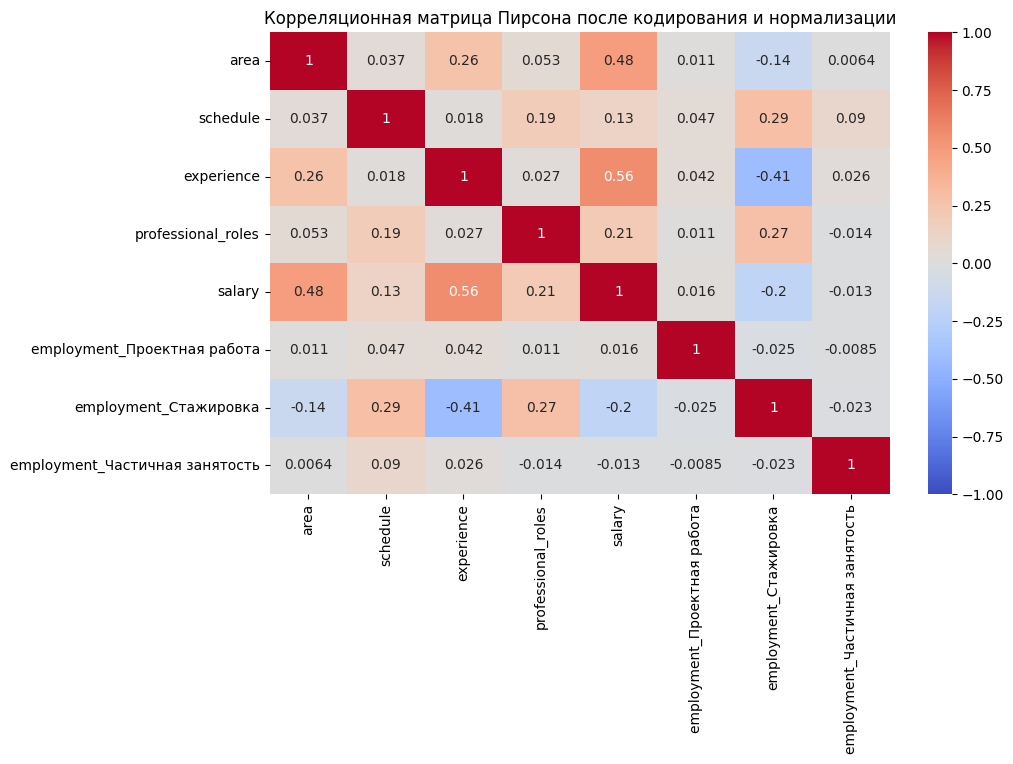

In [ ]:
corr_matrix = col_clear_data.drop('key_skills', axis=1).corr(method='pearson')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Корреляционная матрица Пирсона после кодирования и нормализации')
plt.show()

Коэффициент Спирмена устойчив к выбросам

Более всего коррелируют salary и experience (0.54), что указывает на положительную зависимость опыта от заработной платы.
Также коррелируют salary и area (0.48), что может говорить о зависимости зарплаты от географического расположения.
employment_Стажировка имеет отрицательную корреляцию с salary (-0.21), и experience (-0.37), что логично.

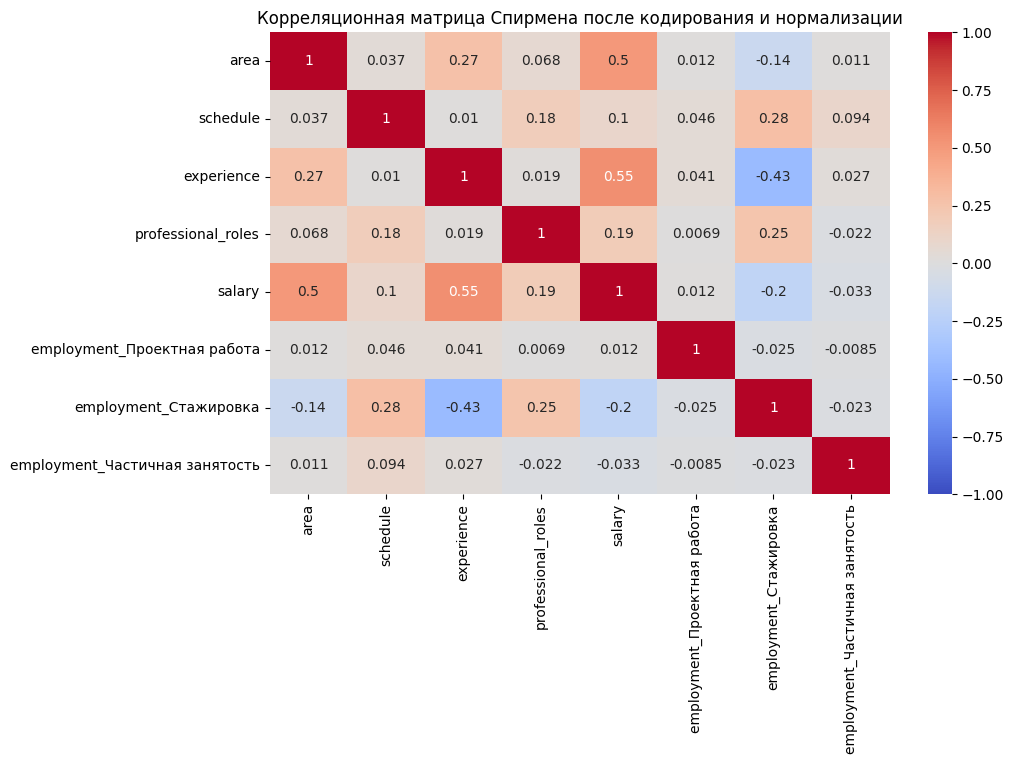

In [ ]:
corr_matrix = col_clear_data.drop('key_skills', axis=1).corr(method='spearman')

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Корреляционная матрица Спирмена после кодирования и нормализации')
plt.show()

Матрица Фика фиксирует нелинейную зависимость


interval columns not set, guessing: ['area', 'schedule', 'experience', 'professional_roles', 'salary', 'employment_Проектная работа', 'employment_Стажировка', 'employment_Частичная занятость']


<Axes: >

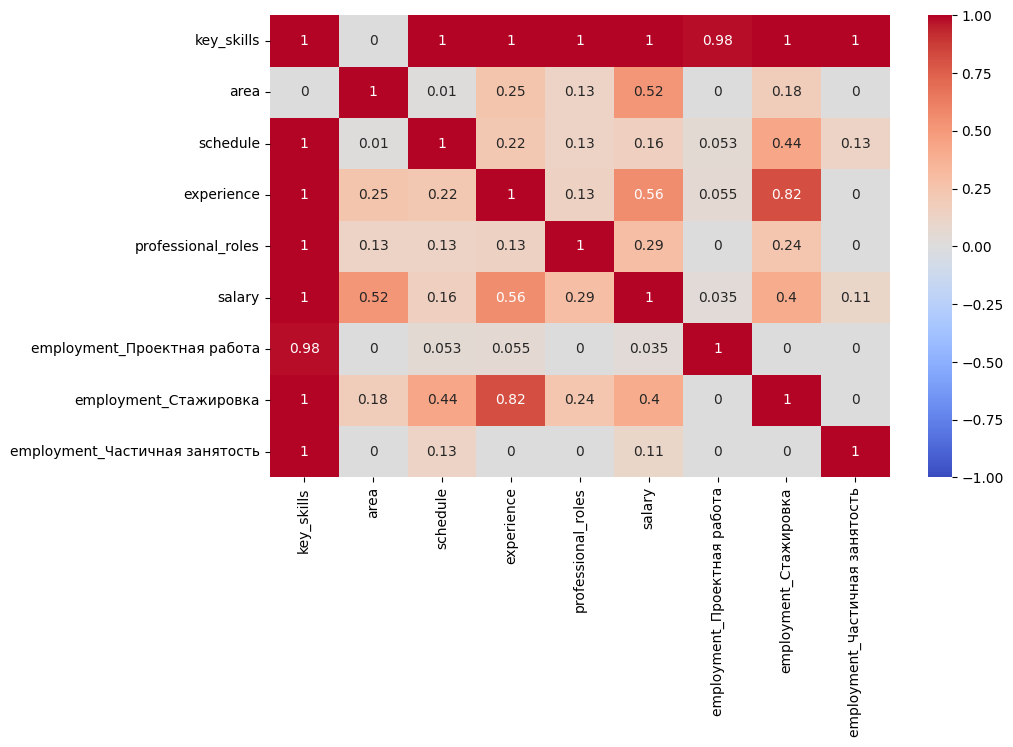

In [ ]:
import phik
from phik import report
plt.figure(figsize=(10, 6))
sns.heatmap(col_clear_data.phik_matrix(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

Коффициенты Спирмана (робастны к выбросам) и коэффициента Пирсона отлчаются от друг от друга максимум на сотые значения -> в данных отсутствуют выбросы

Разница в коэффициентах корреляции между матрицами Спирмена и Фика может указывать на наличие нелинейных зависимостей в данных.

Значительная разница между коэффициентами корреляции Спирмена (-0.43) и Пфика (0.82) между признаками employment_Стажировка и experience действительно указывает на наличие нелинейной зависимости между этими переменными. Монотонная зависимость указывала: чем меньше опыт работы, тем выше вероятность, что человек окажется на стажировке. Высокая нелинейность может быть интерпретирована как резкре понижение вероятности нахождения на стажировке при повышении опыта

Выявлена очень высокая нелинейная, сложная зависимость опыта, занятости, графика работы от навыков. Далее навыки будут сгруппированы по профессиям и почищены. Преобразование поможет избежать утечки данных

Остальные данные содержат очень слабую нелинейность

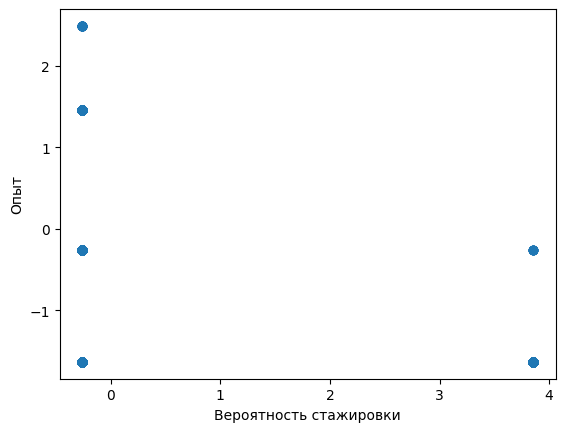

In [ ]:
plt.scatter(col_clear_data['employment_Стажировка'], col_clear_data['experience'])
plt.xlabel('Вероятность стажировки')
plt.ylabel('Опыт')
plt.show()

График указывает на нелинейную зависимость между опытом и занятостью - стажировка


Конструируем новые признаки - работаем с навыками и другими признаками

In [ ]:
clear_data.head()

,key_skills,area,schedule,experience,employment,professional_roles,salary
1,"bpmn, epc, uml, ms dynamics crm, power bi, sql...",Москва,Удаленная работа,2.0,Полная занятость,Бизнес-аналитик,150000.0
9,"коммуникабельность, системность, обучаемость, ...",Москва,Гибкий график,2.0,Полная занятость,Аналитик,90000.0
15,"sql, базы данных, python, power bi, ms sql, ap...",Калининград,Полный день,2.0,Полная занятость,"BI-аналитик, аналитик данных",80000.0
33,"power bi, ms excel, социологические исследования",Москва,Полный день,0.0,Полная занятость,"BI-аналитик, аналитик данных",60000.0
34,"python, pandas, numpy, scikit-learn, tensorflo...",Санкт-Петербург,Полный день,2.0,Полная занятость,Аналитик,120000.0


Рассмотрим навыки для каждой профессии отдельно

In [ ]:
data_bi = clear_data[clear_data['professional_roles'] == 'BI-аналитик, аналитик данных']
data_anal = clear_data[clear_data['professional_roles'] == 'Аналитик']
data_bus = clear_data[clear_data['professional_roles'] == 'Бизнес-аналитик']
data_sci = clear_data[clear_data['professional_roles'] == 'Дата-сайентист']
data_prod = clear_data[clear_data['professional_roles'] == 'Продуктовый аналитик']
data_sys = clear_data[clear_data['professional_roles'] == 'Системный аналитик']
data_mar = clear_data[clear_data['professional_roles'] == 'Маркетолог-аналитик']

In [ ]:
o = ['area', 'schedule', 'employment', 'professional_roles']
for col in o:
    if clear_data[col].nunique() < 5:
        one_hot = pd.get_dummies(clear_data[col], prefix=col, drop_first=True)
        clear_data = pd.concat([clear_data.drop(col, axis=1), one_hot], axis=1)
    else:
        mean_target = clear_data.groupby(col)['salary'].mean()
        clear_data[col] = clear_data[col].map(mean_target)

In [ ]:
clear_data['employment_Проектная работа'] = clear_data['employment_Проектная работа'].astype(int)
clear_data['employment_Стажировка'] = clear_data['employment_Стажировка'].astype(int)
clear_data['employment_Частичная занятость'] = clear_data['employment_Частичная занятость'].astype(int)

In [ ]:
#Создадим признаки,  которые лучше объяснят модели присутствующую нелинейность
clear_data['experience^3'] = clear_data['experience'].apply(lambda x: x ** 3)
clear_data['exp+emp_Стаж'] = clear_data['experience'] + col_clear_data['employment_Стажировка']

In [ ]:
#Новые признаки
clear_data['experience_to_salary_ratio'] = clear_data['experience'] / clear_data['salary']
clear_data['area_to_salary_ratio'] = clear_data['area'] / clear_data['salary']
clear_data['has_experience'] = (clear_data['experience'] > 0).astype(int)

In [ ]:
def ecd_skills(df, skills):
    for skill in skills:
        df.loc[:, skill] = df['key_skills'].str.contains(skill, regex=False).astype(int)
    return df

In [ ]:
def freq_skills(df):
    skills = []
    for entry in df['key_skills']:
        if isinstance(entry, str):
            skills.extend([skill.strip().lower() for skill in entry.replace(';', ',').split(',')])

    skill_counts = Counter(skills)

    df_skill_counts = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Frequency']).sort_values(by='Frequency', ascending=False)

    return df_skill_counts

In [ ]:
enc_skills = []
def clean_skills(skills_list, *args):
    skills_list.remove(*args)
    enc_skills.extend(skills_list)
    return enc_skills

**Считаем навыки редкими, если они встречаются реже, чем 5% от максимальной частоты**

In [ ]:
freq_bi = freq_skills(data_bi)
freq_anal = freq_skills(data_anal)
freq_bus = freq_skills(data_bus)
freq_sci = freq_skills(data_sci)
freq_mar = freq_skills(data_mar)
freq_prod = freq_skills(data_prod)
freq_sys = freq_skills(data_sys)

In [ ]:
freq_bi = freq_bi[freq_bi['Frequency'] > 9]

In [ ]:
freq_anal = freq_anal[freq_anal['Frequency'] > 19]

In [ ]:
freq_bus = freq_bus[freq_bus['Frequency'] > 10]

In [ ]:
freq_sci = freq_sci[freq_sci['Frequency'] > 5]

In [ ]:
freq_mar

,Skill,Frequency
12,маркетинговые исследования,4
13,маркетинговый анализ,3
14,ms powerpoint,2
2,конкурентная аналитика,2
3,анализ бизнес показателей,2
1,аналитические исследования,2
40,ga4,1
31,бренд стратегия,1
32,а/b-тест,1
33,ux-исследования,1


In [ ]:
freq_prod = freq_prod[freq_prod['Frequency'] > 1]

In [ ]:
freq_sys = freq_sys[freq_sys['Frequency'] > 1]

**Находим синонимы выражений и приводим навыки к единому виду**

In [ ]:
syn_dict = {
    'анализ продаж': 'аналитика продаж',
    'анализ конкурентной среды': 'конкурентная аналитика',
    'big data': 'большие данные',
    'работа с большим объемом информации': 'большие данные',
    'bi': 'ms power bi',
    'power bi': 'ms power bi',
    'power point': 'ms powerpoint',
    'machine learning': 'машинное обучение',
    'классическое машинное обучение': 'машинное обучение',
    'математическая статистика': 'статистика',
    'статистический анализ': 'статистика',
    'databases': 'базы данных',
    'работа с базами данных': 'базы данных',
    'опыт работы с базами данных': 'базы данных',
    'аналитический склад ума': 'аналитическое мышление',
    'подготовка отчетов': 'аналитические отчеты',
    'формирование аналитической отчетности': 'аналитические отчеты',
    'data analysis': 'анализ данных',
    'сбор и анализ информации': 'анализ данных',
    'аналитические исследования': 'анализ данных',
    'системное мышление': 'системный анализ',
    'маркетинговая стратегия': 'маркетинговое планирование',
    'анализ бизнес показателей': 'бизнес-анализ',
    'анализ бизнес-процессов': 'бизнес-анализ',
    'описание бизнес-процессов': 'бизнес-анализ',
    'маркетинговые исследования': 'маркетинговый анализ',
    'agile product management': 'agile',
    'проведение презентаций': 'навыки презентации',
    'eda': 'анализ данных'}

words_2_del = ['', 'работа в команде', 'грамотная речь', 'обучение и развитие', 'коммуникабельность', 'системность',
               'обучаемость', 'оперативность', 'нацелен на результат', 'удаленная работа', 'управление командой', 'работа в команде	',
               'умение работать в коллективе', 'пользователь пк', 'точность и внимательность к деталям', 'ответственность']

def replace_synonyms(col, d):
    for i, line in enumerate(col):
        if isinstance(line, str):
            new_line = []
            words = [word.strip() for word in line.replace(';', ',').split(',')]
            new_line = [d[word] if word in d else word for word in words]
            new_line = [word for word in new_line if word not in words_2_del]
        col[i] = ','.join(new_line)
    return col

clear_data['key_skills'] = replace_synonyms(clear_data['key_skills'], syn_dict)

In [ ]:
import re

pattern = re.compile(r'\b(?:' + '|'.join(re.escape(key) for key in syn_dict.keys()) + r')\b', re.IGNORECASE)

def replace_synonyms(text, pattern, syn_dict):
    if isinstance(text, str):
        def synonym_replacer(match):
            found_word = match.group(0).lower()
            return syn_dict.get(found_word, found_word)

        replaced_text = re.sub(pattern, synonym_replacer, text)

        words = replaced_text.split()
        unique_words = list(dict.fromkeys(words))
        return ' '.join(unique_words)

    return text

clear_data['key_skills'] = clear_data['key_skills'].apply(lambda x: replace_synonyms(x, pattern, syn_dict))

In [ ]:
words_2_del = ['', 'работа в команде', 'грамотная речь', 'обучение и развитие', 'коммуникабельность', 'системность',
               'обучаемость', 'оперативность', 'нацелен на результат', 'удаленная работа', 'управление командой',
               'работа в команде', 'умение работать в коллективе', 'пользователь пк',
               'точность и внимательность к деталям', 'ответственность', 'умение принимать решения', 'командообразование']

pattern = re.compile(r'\b(?:' + '|'.join(re.escape(word) for word in words_2_del if word) + r')\b', re.IGNORECASE)

def clean_text(text, pattern):
    if isinstance(text, str):
        cleaned_text = re.sub(pattern, '', text)
        cleaned_text = re.sub(r'\s{2,}', ' ', cleaned_text).strip()
        return cleaned_text
    return text

clear_data['key_skills'] = clear_data['key_skills'].apply(lambda x: clean_text(x, pattern))

In [ ]:
def get_skills(df):
    skill_list = []
    for skills in df['Skill']:
        if isinstance(skills, str):
            skill_list.extend([skill.strip().lower() for skill in skills.replace(';', ',').split(',')])
    final_skills = list(set(skill_list))
    return final_skills

In [ ]:
all_skills = (
    get_skills(freq_bi) +
    get_skills(freq_anal) +
    get_skills(freq_bus) +
    get_skills(freq_sci) +
    get_skills(freq_mar) +
    get_skills(freq_prod) +
    get_skills(freq_sys)
)

In [ ]:
all_skills = list(set(all_skills))

In [ ]:
d_w = ['консультирование', 'организаторские навыки', 'дистанционное обучение', 'управление требованиями', 'деловая переписка', 'техническое обслуживание', 'обучение и развитие', 'системный подход', 'английский язык', 'навыки переговоров', 'программы лояльности', 'ориентация на результат', 'техническая поддержка', 'сбор требований', 'коммуникабельность', 'деловое общение', 'умение работать в коллективе', 'ведение переговоров', 'ответственность', 'контроль выполнения задач', 'работа в команде', 'управление командой', 'деловая коммуникация', 'обучение персонала', 'обучение', 'протоколами связи и сенсорами', 'работа в условиях многозадачности', 'техническое задание', 'точность и внимательность к деталям', 'управление проектами', '', 'удаленная работа', 'планирование карьеры', 'сопровождение клиентов', 'тайм-менеджмент', 'грамотная речь']
for i in d_w:
  if i in all_skills:
    all_skills.remove(i)

In [ ]:
ecd_data = clear_data.copy()
ecd_skills(ecd_data, all_skills)

,key_skills,area,schedule,experience,professional_roles,salary,employment_Проектная работа,employment_Стажировка,employment_Частичная занятость,experience^3,...,spark,machine learning,retail,альфа-авто,бизнес-консультирование,excel,сбор и анализ информации,разработка регламентов,проектирование,opencv
1,,167978.208301,147489.274255,2.0,134339.587396,150000.0,0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
9,"market research,анализ данных,конкурентная ана...",167978.208301,149152.194565,2.0,125838.458919,90000.0,0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
15,"английский язык,sql,исследовательское тестиров...",88352.941176,130120.602117,2.0,135485.097607,80000.0,0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
33,"аналитическое мышление,sql,анализ данных,анали...",167978.208301,130120.602117,0.0,135485.097607,60000.0,0,0,0,0.0,...,0,0,0,0,0,1,0,0,0,0
34,"bpmn,crm,бизнес-процессы,бизнес-анализ,оптимиз...",137470.633333,130120.602117,2.0,125838.458919,120000.0,0,0,0,8.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7456,"sql, аналитическое мышление, системный анализ,...",167978.208301,130120.602117,6.0,161713.669378,300000.0,0,0,0,216.0,...,0,0,0,0,0,0,0,0,0,0
7459,"draw.io, sql-запросы, системный анализ, bpmn, ...",118865.647443,147489.274255,6.0,161713.669378,250000.0,0,0,0,216.0,...,0,0,0,0,0,0,0,0,0,0
7460,"аналитика, atlassian jira, ведение переговоров...",167978.208301,147489.274255,6.0,161713.669378,320000.0,0,0,0,216.0,...,0,0,0,0,0,0,0,0,0,0
7465,"разработка бизнес-требований, функциональных т...",167978.208301,130120.602117,6.0,161713.669378,300000.0,1,0,0,216.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
ecd_data = ecd_data.drop('key_skills', axis=1)

**Просмотрим признаки-синонимы и объеденим колонки**

In [ ]:
ecd_data['apache kafka'] += ecd_data['kafka']
ecd_data = ecd_data.drop('kafka', axis=1)

ecd_data['1с: предприятие'] += ecd_data['1с: предприятие 8']
ecd_data = ecd_data.drop('1с: предприятие 8', axis=1)

ecd_data['idef0'] += ecd_data['idef']
ecd_data = ecd_data.drop('idef', axis=1)

ecd_data['jira'] += ecd_data['atlassian jira']
ecd_data = ecd_data.drop('atlassian jira', axis=1)

ecd_data['ms power bi'] += ecd_data['bi']
ecd_data = ecd_data.drop('bi', axis=1)

ecd_data['машинное обучение'] += ecd_data['ml']
ecd_data = ecd_data.drop('ml', axis=1)

ecd_data['agile'] += ecd_data['agile project management']
ecd_data['agile'] += ecd_data['принципы разработки по (agile']
ecd_data = ecd_data.drop('agile project management', axis=1)
ecd_data = ecd_data.drop('принципы разработки по (agile', axis=1)

ecd_data['ms power bi'] += ecd_data['power bi']
ecd_data = ecd_data.drop('power bi', axis=1)

ecd_data['бренд стратегия'] += ecd_data['развитие бренда']
ecd_data = ecd_data.drop('развитие бренда', axis=1)

ecd_data['python'] += ecd_data['знание python']
ecd_data = ecd_data.drop('знание python', axis=1)

ecd_data['машинное обучение'] += ecd_data['machine learning']
ecd_data['машинное обучение'] += ecd_data['классическое машинное обучение']
ecd_data = ecd_data.drop('machine learning', axis=1)
ecd_data = ecd_data.drop('классическое машинное обучение', axis=1)

ecd_data['ms excel'] += ecd_data['excel']
ecd_data = ecd_data.drop('excel', axis=1)

ecd_data['базы данных'] += ecd_data['data base']
ecd_data = ecd_data.drop('data base', axis=1)

ecd_data['scrum'] += ecd_data['scrum)']
ecd_data['scrum'] += ecd_data['framework scrum']
ecd_data = ecd_data.drop('scrum)', axis=1)
ecd_data = ecd_data.drop('framework scrum', axis=1)

Обучение на данных ecd_data показало сильное переобучение, присутсвует мультиколлинеарность в навыках

In [ ]:
corr = ecd_data.corr()
def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

top_correlations = get_top_abs_correlations(ecd_data, 50)
print("Top Absolute Correlations")
print(top_correlations)

Top Absolute Correlations
experience                               experience^3                  0.899156
http                                     retail                        0.841314
apache spark                             scala                         0.839441
scada                                    plc                           0.816356
user flow                                mvp                           0.816356
apache spark                             mlflow                        0.815649
node.js                                  html                          0.814936
experience^3                             exp+emp_Стаж                  0.809486
use cases                                db2                           0.801276
wsdl                                     db2                           0.801276
apache spark                             spark                         0.793757
node.js                                  бизнес-консультирование       0.791034
машинное обуче

Удаляем сильно коррелирующие навыки, которые человек скорее всего не укажет в резюме

In [ ]:
columns_to_drop = ['многозадачность', 'работа в режиме многозадачности',
                   'оптимизация численности персонала', 'жизненный цикл по',
                   'инфобизнес', 'продуктовый анализ']

ecd_data = ecd_data.drop(columns=columns_to_drop)

Удаляем оставшиеся сильно коррелирующие признаки

In [ ]:
columns_to_drop = ['веб-программирование', 'java или c++', 'atlassian', 'waterfall', 'soa', 'java']

ecd_data = ecd_data.drop(columns=columns_to_drop)

In [ ]:
highly_correlated = set()
corr_threshold = 0.85
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > corr_threshold:
            colname = corr.columns[i]
            highly_correlated.add(colname)
print(*highly_correlated)

experience^3


Эмпирически выявлено наличие константных и квазиконстантных признаков. Нормализуем признаки и выявим константные и квазиконстаные. Удалим их

In [ ]:
from sklearn.feature_selection import VarianceThreshold
ecd_data_scaled = ecd_data.copy()
selector = VarianceThreshold()
selector.fit_transform(ecd_data_scaled)

array([[1.67978208e+05, 1.47489274e+05, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.67978208e+05, 1.49152195e+05, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.83529412e+04, 1.30120602e+05, 2.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.67978208e+05, 1.47489274e+05, 6.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.67978208e+05, 1.30120602e+05, 6.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.67978208e+05, 1.30120602e+05, 6.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0)

selected = selector.fit_transform(ecd_data_scaled)

selected_features = ecd_data_scaled.columns[selector.get_support()]

In [ ]:
#признаки с нулевой дисперсией
ecd_data_clean = ecd_data.drop([f for f in ecd_data_scaled if f not in selected_features], axis=1)
print(len(ecd_data.columns) - len(ecd_data_clean.columns))

33


Выводы: необходимо было сконструировать новые фичи, для объяснения нелинейности модели. Главным образом на качество повлияли новые фичи и удаление сильно коррелирующих фичей. Все данные были подвергнуты преобразованию: среднее арифметическое от зарплаты и опыта работы, енкодинг локации, должностей, занятости и графика работы. Для данных,  коррелирующих нелинейно необходимо было сделать новые признаки (возведение в степень, объединение признаков). Также созданы признаки, лучше описывающие вклад локации и опыта в зарплату. Навыки были отобраны и почищены,  чтобы проинтерпретировать вклад в предсказанный результат.

**Строим модели на данных**

In [9]:
import shap
import optuna
from sklearn.model_selection import train_test_split
import catboost
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_log_error, root_mean_squared_error
from permetrics.regression import RegressionMetric
from numpy import array
from joblib import load, dump

In [ ]:
ecd_data_clean.to_csv('for_split.csv') #обработанный датасет

In [10]:
ecd_data_clean = pd.read_csv('for_split.csv')

In [11]:
ecd_data_clean = ecd_data_clean.drop('Unnamed: 0', axis=1)

In [13]:
y = ecd_data_clean['salary']
X = ecd_data_clean.drop('salary', axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Сравниваем статистики для X_train, X_test, y_train, y_test

In [15]:
print("Train target mean:", np.mean(y_train))
print("Train target std:", np.std(y_train))
print("Train target median:", np.median(y_train))

print("Test target mean:", np.mean(y_test))
print("Test target std:", np.std(y_test))
print("Test target median:", np.median(y_test))

Train target mean: 136153.29417562982
Train target std: 68024.63367977193
Train target median: 115000.0
Test target mean: 135624.36933194153
Test target std: 67347.2815204683
Test target median: 115000.0


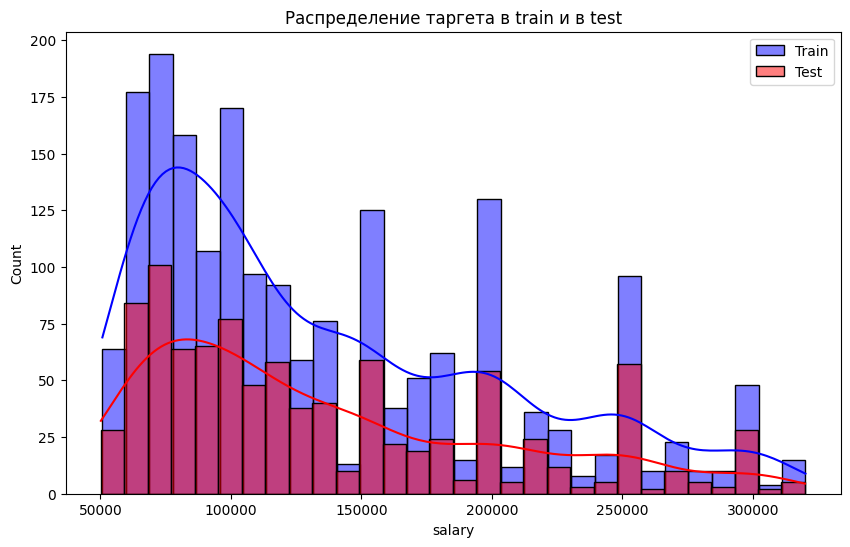

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(y_train, color="blue", label="Train", kde=True, bins=30)
sns.histplot(y_test, color="red", label="Test", kde=True, bins=30)
plt.title("Распределение таргета в train и в test")
plt.legend()
plt.show()

In [ ]:
train_stats = pd.DataFrame(X_train).describe()
test_stats = pd.DataFrame(X_test).describe()

print("Train set statistics:\n", train_stats)
print("Test set statistics:\n", test_stats)

Train set statistics:
                 area       schedule   experience  professional_roles  \
count    1945.000000    1945.000000  1945.000000         1945.000000   
mean   135875.773790  135916.855157     2.381491       135918.940339   
std     33222.443669    8626.127348     1.450829        14028.009348   
min     53958.340000   99005.465625     0.000000       125838.458919   
25%    108366.153846  130120.602117     2.000000       125838.458919   
50%    137470.633333  130120.602117     2.000000       125838.458919   
75%    167978.208301  147489.274255     4.500000       135485.097607   
max    297043.175000  149152.194565     6.000000       164383.469707   

       experience^3  exp+emp_Стаж  employment_Проектная работа  \
count   1945.000000   1945.000000                  1945.000000   
mean      29.494859      2.365393                     0.009254   
std       41.300677      1.389323                     0.095779   
min        0.000000     -0.259383                     0.000000  

In [18]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [19]:
train_preds = model_rf.predict(X_train)
test_preds = model_rf.predict(X_test)
train_evaluator = RegressionMetric(array(y_train), array(train_preds))
test_evaluator = RegressionMetric(array(y_test), array(test_preds))
print(f'MPE на трейне случайного леса {train_evaluator.mean_percentage_error()}')
print(f'MPE на тесте случайного леса {test_evaluator.mean_percentage_error()}')
print('-------------------------------------------------')
train_mae = mean_absolute_error(y_train, train_preds)
print(f'MAE случайного леса на трейне: {train_mae}')
test_mae = mean_absolute_error(y_test, test_preds)
print(f'MAE случайного леса на тeсте: {test_mae}')
print('-------------------------------------------------')
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)
print(f'RMSE случайного леса на трейне: {train_rmse}')
print(f'RMSE случайного леса на тесте: {test_rmse}')
print('-------------------------------------------------')
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
print(f'MAPE случайного леса на трейне: {train_mape}')
print(f'MAPE случайного леса на тесте: {test_mape}')
print('-------------------------------------------------')
train_rmsle = np.sqrt(mean_squared_log_error(y_train, train_preds))
test_rmsle = np.sqrt(mean_squared_log_error(y_test, test_preds))
print(f'RMSLE случайного леса на трейне: {train_rmsle}')
print(f'RMSLE случайного леса на тесте: {test_rmsle}')


MPE на трейне случайного леса -0.000492892991855439
MPE на тесте случайного леса 0.0006611214254219456
-------------------------------------------------
MAE случайного леса на трейне: 499.31784605295707
MAE случайного леса на тeсте: 1228.080177563675
-------------------------------------------------
RMSE случайного леса на трейне: 1427.5554632929006
RMSE случайного леса на тесте: 3344.411817764919
-------------------------------------------------
MAPE случайного леса на трейне: 0.003773373517380097
MAPE случайного леса на тесте: 0.00958202522348195
-------------------------------------------------
RMSLE случайного леса на трейне: 0.008452378214252713
RMSLE случайного леса на тесте: 0.022576796887102672


In [20]:
model = CatBoostRegressor(random_state=42)
model.fit(X_train, y_train)

Learning rate set to 0.045481
0:	learn: 65517.1240834	total: 49.7ms	remaining: 49.7s
1:	learn: 62967.1694166	total: 52.7ms	remaining: 26.3s
2:	learn: 60893.7170480	total: 56ms	remaining: 18.6s
3:	learn: 58774.6745506	total: 58.7ms	remaining: 14.6s
4:	learn: 56642.4470914	total: 61.6ms	remaining: 12.2s
5:	learn: 54516.6829727	total: 64.5ms	remaining: 10.7s
6:	learn: 52578.7781293	total: 67.4ms	remaining: 9.56s
7:	learn: 50640.1680034	total: 70.2ms	remaining: 8.71s
8:	learn: 48714.7125376	total: 73.1ms	remaining: 8.04s
9:	learn: 46987.4316460	total: 75.9ms	remaining: 7.51s
10:	learn: 45317.0501497	total: 78.8ms	remaining: 7.08s
11:	learn: 43680.5216821	total: 81.4ms	remaining: 6.7s
12:	learn: 42148.0639481	total: 84.3ms	remaining: 6.4s
13:	learn: 40733.5291259	total: 87.1ms	remaining: 6.13s
14:	learn: 39345.6055407	total: 89.9ms	remaining: 5.9s
15:	learn: 38024.8755084	total: 92.6ms	remaining: 5.69s
16:	learn: 36713.3563751	total: 95.6ms	remaining: 5.53s
17:	learn: 35510.9671092	total: 9

In [21]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_evaluator = RegressionMetric(array(y_train), array(train_preds))
test_evaluator = RegressionMetric(array(y_test), array(test_preds))
print(f'MPE на трейне бустинга {train_evaluator.mean_percentage_error()}')
print(f'MPE на тесте бустинга {test_evaluator.mean_percentage_error()}')
print('-------------------------------------------------')
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
print(f'MAE бустинга на трейне: {train_mae}')
print(f'MAE бустинга  на тeсте: {test_mae}')
print('-------------------------------------------------')
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)
print(f'RMSE бустинга на трейне: {train_rmse}')
print(f'RMSE бустинга на тесте: {test_rmse}')
print('-------------------------------------------------')
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
print(f'MAPE бустинга на трейне: {train_mape}')
print(f'MAPE бустинга на тесте: {test_mape}')
print('-------------------------------------------------')
train_rmsle = np.sqrt(mean_squared_log_error(y_train, train_preds))
test_rmsle = np.sqrt(mean_squared_log_error(y_test, test_preds))
print(f'RMSLE бустинга на трейне: {train_rmsle}')
print(f'RMSLE бустинга на тесте: {test_rmsle}')

MPE на трейне бустинга -0.0001161476509137096
MPE на тесте бустинга -0.0002085053510481065
-------------------------------------------------
MAE бустинга на трейне: 692.1152959560717
MAE бустинга  на тeсте: 1088.5376137734222
-------------------------------------------------
RMSE бустинга на трейне: 902.6568262555359
RMSE бустинга на тесте: 1808.290929379458
-------------------------------------------------
MAPE бустинга на трейне: 0.005843299924506855
MAPE бустинга на тесте: 0.008906466192504714
-------------------------------------------------
RMSLE бустинга на трейне: 0.00787749963820776
RMSLE бустинга на тесте: 0.014436808542832039


In [23]:
def objective(trial):
    param = {}
    param['learning_rate'] = trial.suggest_discrete_uniform("learning_rate", 0.001, 0.02, 0.001)
    param['depth'] = trial.suggest_int('depth', 4, 15)
    param['l2_leaf_reg'] = trial.suggest_discrete_uniform('l2_leaf_reg', 1.0, 5.5, 0.5)
    param['min_child_samples'] = trial.suggest_categorical('min_child_samples', [1, 4, 8, 16, 32])
    param['grow_policy'] = 'Depthwise'
    param['iterations'] = 10000
    param['use_best_model'] = True
    param['eval_metric'] = 'RMSE'
    param['od_type'] = 'iter'
    param['od_wait'] = 20
    param['random_state'] = 42
    param['logging_level'] = 'Silent'

    regressor = CatBoostRegressor(**param)

    regressor.fit(X_train.copy(), y_train.copy(),
                  eval_set=[(X_train.copy(), y_train.copy())],
                  early_stopping_rounds=100)
    test_loss = root_mean_squared_error(y_test, regressor.predict(X_test.copy()))
    return test_loss

Для подбора гиперпараметров библиотека Optuna

In [ ]:
%%time
study = optuna.create_study(study_name='catboost-seed42')
study.optimize(objective, n_trials=500, n_jobs=-1, timeout=7200)

[I 2024-09-25 09:34:55,241] A new study created in memory with name: catboost-seed42


In [ ]:
print(study.best_value)
print(study.best_params)

НА ~300 итерациях выявлены лучший параметры с метрикой RMSE на тесте 1347,66

In [24]:
params = {'learning_rate': 0.011, 'depth': 4, 'l2_leaf_reg': 1.0, 'min_child_samples': 8}
model_hyper = CatBoostRegressor(**params, iterations=10000, early_stopping_rounds=100, random_state=42)
model_hyper.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
5014:	learn: 690.8952969	total: 10.2s	remaining: 10.1s
5015:	learn: 690.8616388	total: 10.2s	remaining: 10.1s
5016:	learn: 690.7648441	total: 10.2s	remaining: 10.1s
5017:	learn: 690.6004044	total: 10.2s	remaining: 10.1s
5018:	learn: 690.4909196	total: 10.2s	remaining: 10.1s
5019:	learn: 690.4241570	total: 10.2s	remaining: 10.1s
5020:	learn: 690.3011715	total: 10.2s	remaining: 10.1s
5021:	learn: 690.1819927	total: 10.2s	remaining: 10.1s
5022:	learn: 690.0995608	total: 10.2s	remaining: 10.1s
5023:	learn: 690.0142635	total: 10.2s	remaining: 10.1s
5024:	learn: 689.8477305	total: 10.2s	remaining: 10.1s
5025:	learn: 689.7689874	total: 10.2s	remaining: 10.1s
5026:	learn: 689.7119666	total: 10.2s	remaining: 10.1s
5027:	learn: 689.5854583	total: 10.2s	remaining: 10.1s
5028:	learn: 689.4387134	total: 10.2s	remaining: 10.1s
5029:	learn: 689.3617656	total: 10.2s	remaining: 10.1s
5030:	learn: 689.2061836	total: 10.2s	remaining: 10.

In [25]:
train_preds = model_hyper.predict(X_train)
test_preds = model_hyper.predict(X_test)
train_evaluator = RegressionMetric(array(y_train), array(train_preds))
test_evaluator = RegressionMetric(array(y_test), array(test_preds))
print(f'MPE на трейне бустинга {train_evaluator.mean_percentage_error()}')
print(f'MPE на тесте бустинга {test_evaluator.mean_percentage_error()}')
print('-------------------------------------------------')
train_mae = mean_absolute_error(y_train, train_preds)
test_mae = mean_absolute_error(y_test, test_preds)
print(f'MAE бустинга на трейне: {train_mae}')
print(f'MAE бустинга  на тeсте: {test_mae}')
print('-------------------------------------------------')
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)
print(f'RMSE бустинга на трейне: {train_rmse}')
print(f'RMSE бустинга на тесте: {test_rmse}')
print('-------------------------------------------------')
train_mape = mean_absolute_percentage_error(y_train, train_preds)
test_mape = mean_absolute_percentage_error(y_test, test_preds)
print(f'MAPE бустинга на трейне: {train_mape}')
print(f'MAPE бустинга на тесте: {test_mape}')
print('-------------------------------------------------')
train_rmsle = np.sqrt(mean_squared_log_error(y_train, train_preds))
test_rmsle = np.sqrt(mean_squared_log_error(y_test, test_preds))
print(f'RMSLE бустинга на трейне: {train_rmsle}')
print(f'RMSLE бустинга на тесте: {test_rmsle}')

MPE на трейне бустинга -3.216191753964941e-05
MPE на тесте бустинга -0.0002720856806830359
-------------------------------------------------
MAE бустинга на трейне: 298.88427329257854
MAE бустинга  на тeсте: 594.0392456851627
-------------------------------------------------
RMSE бустинга на трейне: 415.1114429591596
RMSE бустинга на тесте: 1098.705720898792
-------------------------------------------------
MAPE бустинга на трейне: 0.0025717977452617206
MAPE бустинга на тесте: 0.004837423487724851
-------------------------------------------------
RMSLE бустинга на трейне: 0.003627184504546569
RMSLE бустинга на тесте: 0.008795785715902945


**Анализ результатов**

При преобразовании признаков experience, area, employment_стажировка модели предпочла новые признаки как более важные, они лучше описывают зависимости, чем признаки навыков. Тем не менее метрики стали 'почти идеальными'. До преобразований и консутрирования новых признаков RMSE на тесте составляло 48692, а MAPE 0.297

Наилучшие метрики:

**MPE на трейне:** -3.216191753964941e-05

**MPE на тесте:** -0.0002720856806830359

**MAE на трейне:**: 298.88427329257854

**MAE на тeсте:**: 594.0392456851627

**RMSE на трейне:**: 415.1114429591596

**RMSE на тесте:** 1098.705720898792

**MAPE на трейне:** 0.0025717977452617206

**MAPE на тесте:** 0.004837423487724851

**RMSLE на трейне:** 0.003627184504546569

**RMSLE на тесте:** 0.008795785715902945


Все еще осталась проблема переобучения, что видно по метрикам RMSE, MAE на трейне и тесте, однако уровень переобучения не является критическим, (особенно если учитывать низкий уровень MAPE и MPE)

Сохраним модели

In [27]:
dump(model_rf, 'dt.joblib')
model.save_model('cb',
           format="cbm",
           export_parameters=None,
           pool=None)
model_hyper.save_model('cb_super',
           format="cbm",
           export_parameters=None,
           pool=None)

In [28]:
explainer = shap.Explainer(model_hyper)
shap_values = explainer(X_test)

Получаем вклад каждого признака в результат

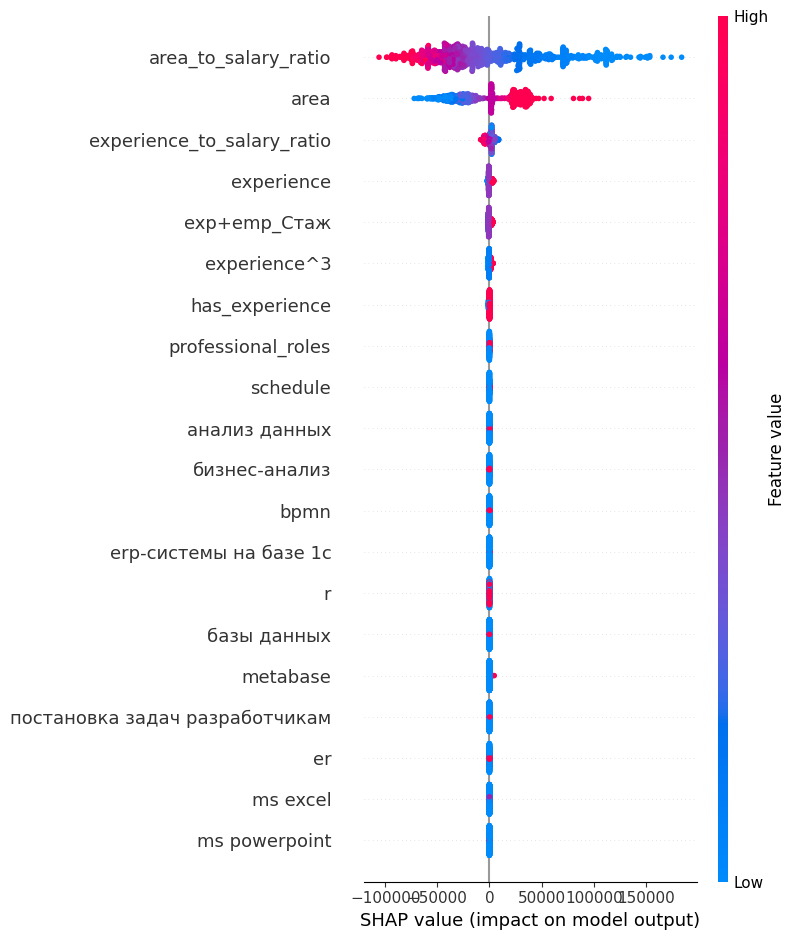

In [32]:
shap.summary_plot(shap_values, X_test)

Видим, что самыми значимыми признаками, которые оказывают наибольшее влияние на предсказания модели, являются: area_to_salary_ratio, area,
experience_to_salary_ratio

In [30]:
shap_values_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

In [31]:
shap_values_df

,area,schedule,experience,professional_roles,experience^3,exp+emp_Стаж,employment_Проектная работа,employment_Стажировка,employment_Частичная занятость,experience_to_salary_ratio,...,oracle,system analysis,sql,mathcad,epc,graphql,retail,google analytics,навыки презентации,разработка бизнес-требований
0,33393.957063,-60.091581,-723.136456,-66.168500,-220.667454,-892.370010,0.0,-0.142009,1.327556,2720.900832,...,-2.038882,-0.050761,-13.865467,-0.083968,-0.141413,0.0,1.953245,-0.527066,-0.282989,0.247340
1,1758.733440,-34.084482,-638.800325,-80.266747,-142.711143,-737.059853,0.0,-0.225317,0.040246,2068.500128,...,-1.671366,-0.050761,7.753622,-0.083968,-0.157617,0.0,0.917342,-0.783850,-0.282989,0.240616
2,21025.670161,-22.383896,-1512.549886,126.738815,-981.833548,-895.397893,0.0,0.057784,1.239371,1401.307379,...,-0.485990,-0.050761,-40.464321,-0.083968,-0.335162,0.0,1.021433,-0.036753,-0.441817,0.232566
3,-23927.013996,-31.335731,2258.011269,-40.617518,1085.611633,2203.896328,0.0,0.230667,0.890178,-5013.087101,...,-1.226141,-0.050761,6.033602,-0.083968,-0.156862,0.0,0.434503,-0.475928,-0.282989,0.228251
4,-22625.884146,-20.566619,-630.958655,-53.582754,-188.695202,-679.150697,0.0,0.213882,0.059149,-772.831335,...,-1.189289,-0.050761,-15.293803,-0.083968,-0.157617,0.0,0.917342,-0.415595,-0.282989,0.233705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
953,1711.523036,-35.957742,-1341.162765,-78.344050,-956.474334,-926.324903,0.0,0.057784,0.044069,1138.253175,...,-1.059047,-0.050761,18.693279,-0.083968,-0.345161,0.0,0.917342,-0.016756,-0.441817,0.228858
954,33703.755088,-48.778698,2477.970756,23.511128,1164.074733,2233.847890,0.0,0.293886,1.122648,-3605.310492,...,38.546225,-0.050761,-8.823662,-0.083968,-0.141413,0.0,1.953245,-0.714893,-0.282989,0.248095
955,-17311.803376,134.586414,-807.115273,7.716427,-211.985525,-914.604114,0.0,-0.142009,0.685664,2399.940136,...,-1.545146,-0.050761,7.658368,-0.083968,-0.156862,0.0,0.434503,-0.547646,-0.282989,0.253913
956,31807.288727,44.304660,2325.629912,-69.847851,1047.093720,2037.553876,0.0,0.318205,1.327556,-4693.839567,...,-1.471066,-0.050761,-13.998289,-0.083968,-0.108264,0.0,1.021433,-0.753244,-0.282989,0.242962
